In [5]:
import matplotlib.pyplot as plt
import numpy as np 

from sklearn.datasets import make_gaussian_quantiles

In [2]:
samples = np.array([
  [1, 2, 3],
  [6, 7, 8],
  [7, 8, 9],
  [3, 4, 5],
  [4, 5, 6],
])

X = samples

targets = np.array([False, True, True, False, False])

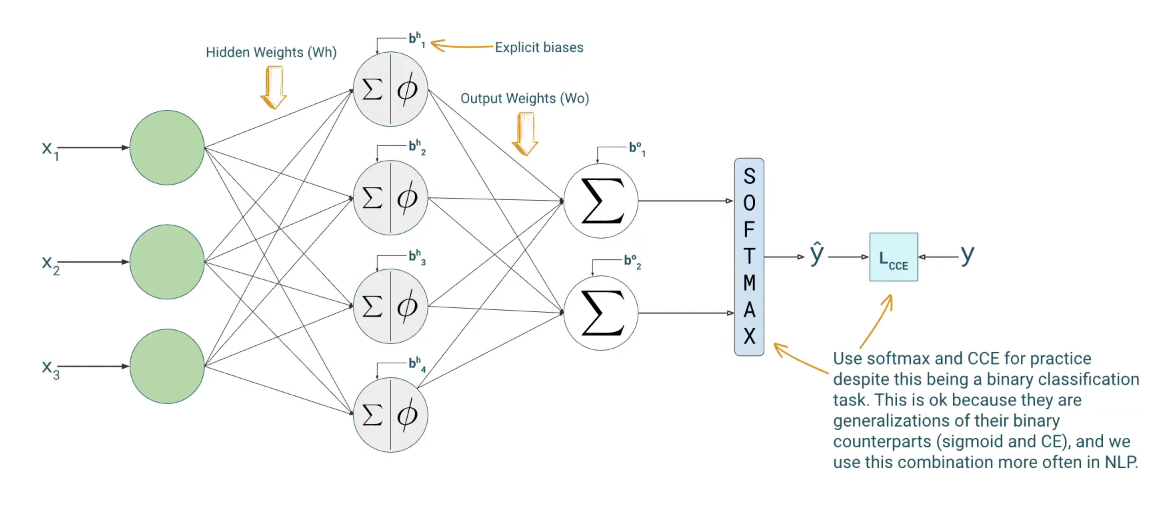

The above is the architecture we will follow

In [3]:
uniques, indices = np.unique(targets, return_inverse=True)
print(f"Original targets: {targets}")
print(f"Unique values: {uniques}")
print(f"Target indices: {indices}")

Original targets: [False  True  True False False]
Unique values: [False  True]
Target indices: [0 1 1 0 0]


In [4]:
# will be used for one hot encoding
n_samples = targets.shape[0]
n_classes = len(uniques)
y = np.zeros((n_samples, n_classes))
print(y)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [5]:
print(np.arange(n_samples))
print(indices)

[0 1 2 3 4]
[0 1 1 0 0]


In [6]:
y[np.arange(n_samples), indices] = 1
print(targets, '\n')
print("After one hot encoding:")
print(y)

[False  True  True False False] 

After one hot encoding:
[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


## Forward pass

In [7]:
print(X.shape)

n_features = X.shape[1]
print(f"Dataset size : {n_samples}")
print(f"Number of features : {n_features}")

(5, 3)
Dataset size : 5
Number of features : 3


In [8]:
n_hidden_units = 4

In [9]:
np.random.seed(10)

Wh = np.random.uniform(low=-0.5, high=0.5, size=(n_features, n_hidden_units))
bh = np.zeros((1,n_hidden_units))

In [10]:
print(Wh)

[[ 0.27132064 -0.47924805  0.13364823  0.24880388]
 [-0.00149299 -0.27520335 -0.30193714  0.26053071]
 [-0.33088916 -0.41166019  0.18535982  0.45339335]]


In [11]:
print(f"Input shape: {X.shape}")
print(f"Hidden weights shape: {Wh.shape}")
print(f"Hidden bias shape: {bh.shape}")

Input shape: (5, 3)
Hidden weights shape: (3, 4)
Hidden bias shape: (1, 4)


In [12]:
print(Wh, '\n')
print("Weights of first hidden unit:")
print(Wh[:, 0].reshape(3, 1)) 

[[ 0.27132064 -0.47924805  0.13364823  0.24880388]
 [-0.00149299 -0.27520335 -0.30193714  0.26053071]
 [-0.33088916 -0.41166019  0.18535982  0.45339335]] 

Weights of first hidden unit:
[[ 0.27132064]
 [-0.00149299]
 [-0.33088916]]


In [13]:
h1 = np.dot(X, Wh) + bh
print(h1.shape)
print(h1)

(5, 4)
[[-0.72433282 -2.26463532  0.08585342  2.13004535]
 [-1.02964036 -8.09519327  0.17120801  6.94368505]
 [-1.09070187 -9.26130486  0.18827893  7.90641299]
 [-0.84645584 -4.5968585   0.11999526  4.05550123]
 [-0.90751735 -5.76297009  0.13706617  5.01822917]]


In [14]:
# ReLU activation function
a1 = np.maximum(0, h1)
print(a1.shape, '\n')

print('Before ReLU (h1):')
print(h1,'\n')

print("After ReLU (a1):")
print(a1)

(5, 4) 

Before ReLU (h1):
[[-0.72433282 -2.26463532  0.08585342  2.13004535]
 [-1.02964036 -8.09519327  0.17120801  6.94368505]
 [-1.09070187 -9.26130486  0.18827893  7.90641299]
 [-0.84645584 -4.5968585   0.11999526  4.05550123]
 [-0.90751735 -5.76297009  0.13706617  5.01822917]] 

After ReLU (a1):
[[0.         0.         0.08585342 2.13004535]
 [0.         0.         0.17120801 6.94368505]
 [0.         0.         0.18827893 7.90641299]
 [0.         0.         0.11999526 4.05550123]
 [0.         0.         0.13706617 5.01822917]]


In [15]:
# We need to generate the output of our hidden layer

np.random.seed(100)
Wo = np.random.uniform(low=-0.5, high=0.5, size=(n_hidden_units, n_classes))
bo = np.zeros((1,n_classes))

In [16]:
print(Wo)

[[ 0.04340494 -0.22163061]
 [-0.07548241  0.34477613]
 [-0.49528114 -0.37843088]
 [ 0.17074908  0.32585276]]


In [17]:
print(f"Hidden layer output shape: {a1.shape}")
print(f"Output weights shape: {Wo.shape}")
print(f"Output bias shape: {bo.shape}")

Hidden layer output shape: (5, 4)
Output weights shape: (4, 2)
Output bias shape: (1, 2)


In [18]:
h2 = np.dot(a1, Wo) + bo
print(h2.shape)
print(h2)

(5, 2)
[[0.32118171 0.66159156]
 [1.10083177 2.19782851]
 [1.25676178 2.5050759 ]
 [0.63304174 1.27608634]
 [0.78897175 1.58333373]]


We have to convert each row into a probability distribution for that we will use softmax

In [19]:
e_x = np.exp(h2)
print(e_x)

[[ 1.3787561   1.93787412]
 [ 3.00666583  9.005437  ]
 [ 3.51402386 12.24448824]
 [ 1.88333047  3.5825912 ]
 [ 2.20113194  4.87116792]]


In [20]:
print(np.exp(10))
print(np.exp(100))
print(np.exp(1000))

22026.465794806718
2.6881171418161356e+43
inf


C:\Users\Abhipreet\AppData\Local\Temp\ipykernel_11676\969166390.py:3: RuntimeWarning: overflow encountered in exp
  print(np.exp(1000))


In [21]:
np.max(h2)

2.5050758959413426

In [22]:
print(h2,'\n')
print('Maximum value from each row:')
print(np.max(h2, axis=1))

[[0.32118171 0.66159156]
 [1.10083177 2.19782851]
 [1.25676178 2.5050759 ]
 [0.63304174 1.27608634]
 [0.78897175 1.58333373]] 

Maximum value from each row:
[0.66159156 2.19782851 2.5050759  1.27608634 1.58333373]


In [23]:
np.max(h2, axis=1, keepdims=True)

array([[0.66159156],
       [2.19782851],
       [2.5050759 ],
       [1.27608634],
       [1.58333373]])

In [24]:
#numerator
e_x = np.exp(h2- np.max(h2, axis=1, keepdims=True))
print(e_x)

[[0.71147867 1.        ]
 [0.33387229 1.        ]
 [0.28698822 1.        ]
 [0.52568947 1.        ]
 [0.45186944 1.        ]]


In [25]:
#denominator
np.sum(e_x, axis=1, keepdims=True)

array([[1.71147867],
       [1.33387229],
       [1.28698822],
       [1.52568947],
       [1.45186944]])

In [26]:
y_hat = e_x / np.sum(e_x, axis=1, keepdims=True)
y_hat

array([[0.41570992, 0.58429008],
       [0.25030304, 0.74969696],
       [0.22299211, 0.77700789],
       [0.34455863, 0.65544137],
       [0.31123284, 0.68876716]])

## Loss function

In [27]:
# We will be using categorical cross entropy
print(y)
print(y_hat)

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]
[[0.41570992 0.58429008]
 [0.25030304 0.74969696]
 [0.22299211 0.77700789]
 [0.34455863 0.65544137]
 [0.31123284 0.68876716]]


In [28]:
np.sum(y * -np.log(y_hat), axis=1)

array([0.87776756, 0.2880862 , 0.25230477, 1.06549102, 1.16721398])

In [29]:
-np.log([0, 0.5, 10])

C:\Users\Abhipreet\AppData\Local\Temp\ipykernel_11676\2101207635.py:1: RuntimeWarning: divide by zero encountered in log
  -np.log([0, 0.5, 10])


array([        inf,  0.69314718, -2.30258509])

In [30]:
print(f"Lower-bound number: {np.finfo(float).eps}")
print(f"Upper-bound number: {1 - np.finfo(float).eps}")

Lower-bound number: 2.220446049250313e-16
Upper-bound number: 0.9999999999999998


In [31]:
np.clip([0, 0.5, 10], np.finfo(float).eps, 1 - np.finfo(float).eps)

array([2.22044605e-16, 5.00000000e-01, 1.00000000e+00])

In [32]:
-np.log(np.clip([0, 0.5, 10], np.finfo(float).eps, 1 - np.finfo(float).eps))

array([3.60436534e+01, 6.93147181e-01, 2.22044605e-16])

In [33]:
y_hat_clipped = np.clip(y_hat, np.finfo(float).eps, 1 - np.finfo(float).eps)
print(y_hat_clipped)

[[0.41570992 0.58429008]
 [0.25030304 0.74969696]
 [0.22299211 0.77700789]
 [0.34455863 0.65544137]
 [0.31123284 0.68876716]]


In [34]:
neg_logs = np.sum(y * -np.log(y_hat_clipped), axis=1)
neg_logs

array([0.87776756, 0.2880862 , 0.25230477, 1.06549102, 1.16721398])

In [35]:
cce_loss = np.mean(neg_logs)
print(f"The loss after this forward pass : {cce_loss}")

The loss after this forward pass : 0.7301727079439226


## Backpropagation

In [36]:
print("y:")
print(y, "\n")
print("y_hat:")
print(y_hat, "\n")

y:
[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]] 

y_hat:
[[0.41570992 0.58429008]
 [0.25030304 0.74969696]
 [0.22299211 0.77700789]
 [0.34455863 0.65544137]
 [0.31123284 0.68876716]] 



In [37]:
dloss_dh2 = (y_hat - y) / n_samples
print(dloss_dh2)

[[-0.11685802  0.11685802]
 [ 0.05006061 -0.05006061]
 [ 0.04459842 -0.04459842]
 [-0.13108827  0.13108827]
 [-0.13775343  0.13775343]]


In [38]:
dh2_dWo = a1
print(dh2_dWo)

[[0.         0.         0.08585342 2.13004535]
 [0.         0.         0.17120801 6.94368505]
 [0.         0.         0.18827893 7.90641299]
 [0.         0.         0.11999526 4.05550123]
 [0.         0.         0.13706617 5.01822917]]


In [39]:
print(f"Wo: {Wo.shape}")

Wo: (4, 2)


In [40]:
print(f"dh2_dWo: {dh2_dWo.shape}")
print(f"dloss_dh2: {dloss_dh2.shape}")

dh2_dWo: (5, 4)
dloss_dh2: (5, 2)


In [41]:
print(f'{dh2_dWo.T.shape} * {dloss_dh2.shape}')

(4, 5) * (5, 2)


In [42]:
print(a1)

[[0.         0.         0.08585342 2.13004535]
 [0.         0.         0.17120801 6.94368505]
 [0.         0.         0.18827893 7.90641299]
 [0.         0.         0.11999526 4.05550123]
 [0.         0.         0.13706617 5.01822917]]


In [43]:
dh2_dWo = a1.T
print(dh2_dWo)

[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.08585342 0.17120801 0.18827893 0.11999526 0.13706617]
 [2.13004535 6.94368505 7.90641299 4.05550123 5.01822917]]


In [44]:
dloss_dWo = np.dot(dh2_dWo, dloss_dh2)
print("The gradient for the output weights (Wo):")
print(dloss_dWo)

The gradient for the output weights (Wo):
[[ 0.          0.        ]
 [ 0.          0.        ]
 [-0.02767625  0.02767625]
 [-0.77160119  0.77160119]]


In [45]:
dloss_dbo = np.sum(dloss_dh2, axis=0, keepdims=True)
print("The gradient for the output biases (Wo):")
print(dloss_dbo)

The gradient for the output biases (Wo):
[[-0.29104069  0.29104069]]


In [46]:
dh2_da1 = Wo.T
print(dh2_da1.shape)

(2, 4)


In [47]:
print(dloss_dh2.shape)
print(Wo.T.shape)

(5, 2)
(2, 4)


In [48]:
print(Wo)

[[ 0.04340494 -0.22163061]
 [-0.07548241  0.34477613]
 [-0.49528114 -0.37843088]
 [ 0.17074908  0.32585276]]


In [49]:
dloss_da1 = np.dot(dloss_dh2, dh2_da1)
print(dloss_da1.shape)
print(dloss_da1)

(5, 4)
[[-0.03097153  0.04911058  0.01365489  0.01812511]
 [ 0.01326784 -0.0210384  -0.0058496  -0.00776458]
 [ 0.01182017 -0.01874287 -0.00521134 -0.00691738]
 [-0.03474305  0.05509097  0.0153177   0.02033227]
 [-0.03650956  0.05789206  0.01609653  0.02136606]]


In [50]:
da1_dh1 = np.zeros(h1.shape, dtype=np.float32)
da1_dh1[h1 > 0] = 1
print(h1,'\n')
print(da1_dh1)

[[-0.72433282 -2.26463532  0.08585342  2.13004535]
 [-1.02964036 -8.09519327  0.17120801  6.94368505]
 [-1.09070187 -9.26130486  0.18827893  7.90641299]
 [-0.84645584 -4.5968585   0.11999526  4.05550123]
 [-0.90751735 -5.76297009  0.13706617  5.01822917]] 

[[0. 0. 1. 1.]
 [0. 0. 1. 1.]
 [0. 0. 1. 1.]
 [0. 0. 1. 1.]
 [0. 0. 1. 1.]]


In [51]:
print(f"dloss_da1: {dloss_da1.shape}")
print(f"da1_dh1: {da1_dh1.shape}")

dloss_da1: (5, 4)
da1_dh1: (5, 4)


In [52]:
dloss_dh1 = da1_dh1 * dloss_da1
print(dloss_dh1)

[[-0.          0.          0.01365489  0.01812511]
 [ 0.         -0.         -0.0058496  -0.00776458]
 [ 0.         -0.         -0.00521134 -0.00691738]
 [-0.          0.          0.0153177   0.02033227]
 [-0.          0.          0.01609653  0.02136606]]


In [53]:
dh1_dWo = X.T

In [54]:
dloss_dWh = np.dot(dh1_dWo, dloss_dh1)

In [55]:
print(f"Hidden weights: {Wh.shape}")
print(f"dh1_dWo: {dloss_dWh.shape}")

Hidden weights: (3, 4)
dh1_dWo: (3, 4)


In [56]:
dloss_dbh = np.sum(dloss_dh1, axis=0, keepdims=True)
dloss_dbh

array([[0.        , 0.        , 0.03400818, 0.04514148]])

In [57]:
# learning rate
lr = 0.01

# Updated output weights and biases
new_Wo = Wo - lr * dloss_dWo
new_bo = bo - lr * dloss_dbo

# Updated hidden weights and biases
new_Wh = Wh - lr * dloss_dWh
new_bh = bh - lr * dloss_dbh

## Forward pass to see if the loss lowers

In [58]:
h1 = np.dot(X, new_Wh) + new_bh
a1 = np.maximum(0, h1)
h2 = np.dot(a1, new_Wo) + new_bo

# Softmax
e_x = np.exp(h2 - np.max(h2, axis=1, keepdims=True))
y_hat = e_x / np.sum(e_x, axis=1, keepdims=True)
y_hat_clipped = np.clip(y_hat, np.finfo(float).eps, 1 - np.finfo(float).eps)

# Cross entropy
neg_logs = np.sum(y * -np.log(y_hat_clipped), axis=1)
new_cce_loss = np.mean(neg_logs)

print(f"New loss : {new_cce_loss}")
print(f"Previous loss : {cce_loss}")


New loss : 0.7168031908508434
Previous loss : 0.7301727079439226


## Creating wrapper

In [23]:
import matplotlib.pyplot as plt
import numpy as np 

from sklearn.datasets import make_gaussian_quantiles

In [24]:
class LayerDense:

    def __init__(self, n_inputs, n_units, lower_bound=-0.5, upper_bound=0.5):
        self.W = np.random.uniform(low=lower_bound, high=upper_bound, size=(n_inputs, n_units))
        self.b = np.zeros((1, n_units))

    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.dot(self.inputs, self.W) + self.b

        return self.output
    
    def backward(self, backprop_signal):

        self.dW = np.dot(self.inputs.T, backprop_signal)
        self.db = np.sum(backprop_signal, axis=0, keepdims=True)

        self.dinputs = np.dot(backprop_signal, self.W.T)
        return self.dinputs

    def update(self, lr):
        self.W = self.W - lr * self.dW
        self.b = self.b - lr * self.db

In [25]:
class ActivationRelu:

    def forward(self, inputs):
        self.inputs = inputs

        self.output = np.maximum(0, self.inputs)
        return self.output

    def backward(self, backprop_signal):
        drelu = np.zeros(self.inputs.shape, dtype=np.float32)
        drelu[self.inputs > 0] = 1

        self.dinputs = drelu * backprop_signal
        return self.dinputs

In [26]:
class SoftmaxCCECombo:

    def forward(self, inputs):
        self.inputs = inputs

        e_x = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        y_hat = e_x / np.sum(e_x, axis=1, keepdims=True)
        y_hat_clipped = np.clip(y_hat, np.finfo(float).eps, 1 - np.finfo(float).eps)

        self.preds = y_hat_clipped
        return self.preds
    
    def loss(self, y):
        neg_logs = -np.log(np.sum(self.preds * y, axis=1))
        self.cce_loss = np.mean(neg_logs)
        return self.cce_loss
    
    def backward(self, y):
        n_samples = len(self.preds)
        self.dinputs = (self.preds - y) / n_samples
        return self.dinputs
    
    
    

In [27]:
X, y = make_gaussian_quantiles(n_samples=1000, n_features=3, n_classes=2)

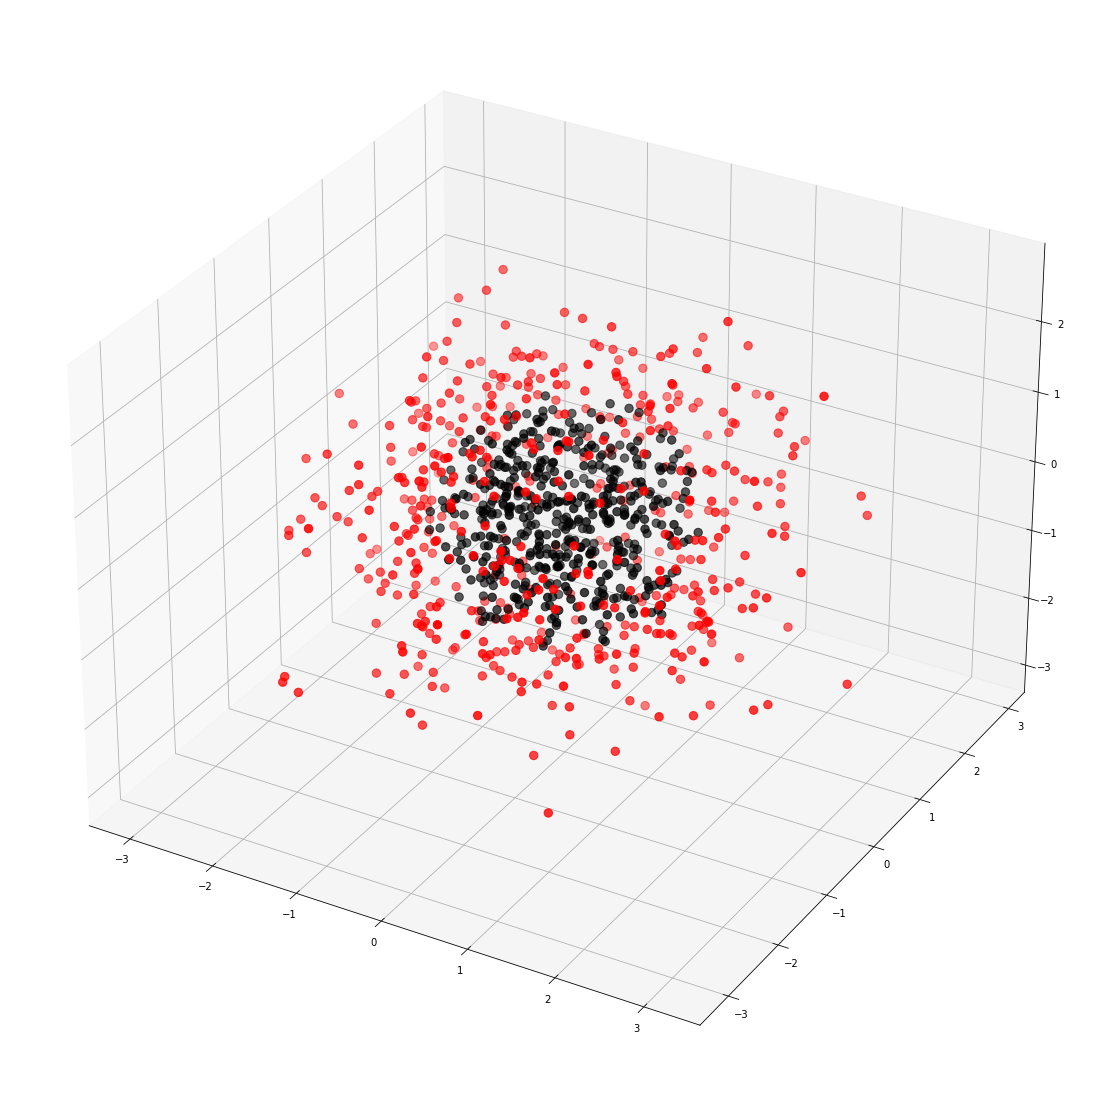

In [28]:
%matplotlib inline

fig = plt.figure(figsize=(20, 20))
ax = plt.axes(projection='3d')
colors = np.array(['black', 'red'])
ax.scatter3D(X[:,0], X[:,1], X[:,2], marker='o', s=70, c=colors[y])

In [29]:
X, y = make_gaussian_quantiles(n_samples=10000, n_features=3, n_classes=2)

In [30]:
print(X[:10])

[[ 0.78455285 -0.10049512 -0.91719061]
 [ 0.36634637 -1.00100289  0.69945261]
 [ 0.66432689  2.2133277   0.83309966]
 [ 1.5317523   0.68005    -0.65258817]
 [ 0.13737488 -0.22010714 -2.50142391]
 [-0.33588563 -1.34714294 -2.39891997]
 [ 0.59372392  0.11254631 -1.64375368]
 [ 0.03109393 -0.65462104  0.98642912]
 [-0.00799251 -1.43509079  3.00506279]
 [-1.23354563 -1.32547989  1.11533134]]


In [31]:
print(y[:10])

[0 0 1 1 1 1 1 0 1 1]


In [32]:
n_samples = X.shape[0]
n_features = X.shape[1]
print(f"Number of samples : (rows): {n_samples}, number of features (cols): {n_features}")

Number of samples : (rows): 10000, number of features (cols): 3


In [33]:
def one_hot_encode(labels):
    uniques, indicies = np.unique(y, return_inverse=True)
    n_rows, n_cols = len(labels), len(uniques)
    one_hot_rows = np.zeros((n_rows, n_cols))
    one_hot_rows[np.arange(n_rows), indicies] = 1

    return one_hot_rows

In [34]:
y_one_hot = one_hot_encode(y)
print(y[:10])
print(y_one_hot[:10])

[0 0 1 1 1 1 1 0 1 1]
[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [35]:
n_hidden_units_1 = 4
n_hidden_units_2 = 4

In [36]:
y_one_hot.shape[1]

2

In [37]:
n_classes = y_one_hot.shape[1]
np.random.seed(0)

dense1 = LayerDense(n_features, n_hidden_units_1)
activation1 = ActivationRelu()

dense2 = LayerDense(n_hidden_units_1, n_hidden_units_2)
activation2 = ActivationRelu()

dense3 = LayerDense(n_hidden_units_2, n_classes)
activation_loss = SoftmaxCCECombo()

In [38]:
def predict(inputs):
    output = dense1.forward(inputs)
    output = activation1.forward(output)

    output = dense2.forward(output)
    output = activation2.forward(output)

    output = dense3.forward(output)
    preds = activation_loss.forward(output)

    predictions = np.argmax(preds, axis=1)
    return predictions

In [39]:
preds = predict(X)
print(f"Prediction accuracy of untrained network: {np.mean(preds==y)}")

Prediction accuracy of untrained network: 0.4999


In [40]:
n_epochs = 30
batch_size = 32

In [41]:
X_batches = [X[i:i+batch_size] for i in range(0, len(X), batch_size)]
y_batches = [y_one_hot[i:i+batch_size] for i in range(0, len(y_one_hot), batch_size)]

In [42]:
print(len(X_batches))
print(len(y_batches))

313
313


In [44]:
for epoch in range(n_epochs):

    for X_batch, y_batch in zip(X_batches, y_batches):

        accuracy_per_batch = []
        loss_per_batch = []

        output = dense1.forward(X_batch)
        output = activation1.forward(output)

        output = dense2.forward(output)
        output = activation2.forward(output)

        output = dense3.forward(output)
        y_probas = activation_loss.forward(output)

        # The loss returned is averaged already, we are undoing the average operation by mulitplying by len(y_batch)
        loss_per_batch.append(activation_loss.loss(y_batch) * len(y_batch))

        predictions = np.argmax(y_probas, axis=1)
        y_true = np.argmax(y_batch, axis=1)
        accuracy_per_batch.append(predictions==y_true)

        #Backward pass
        dinput = activation_loss.backward(y_batch)
        dinput = dense3.backward(dinput)

        dinput = activation2.backward(dinput)
        dinput = dense2.backward(dinput)

        dinput = activation1.backward(dinput)
        dinput = dense1.backward(dinput)

        #Gradient descent
        dense3.update(lr=0.01)
        dense2.update(lr=0.01)
        dense1.update(lr=0.01)

    epoch_accuracy = np.mean(accuracy_per_batch)
    epoch_loss = np.mean(loss_per_batch)
    print(f'epoch: {epoch}, ' +
          f'acc : {epoch_accuracy:.3f}, ' +
          f'loss: {epoch_loss:.3f}')


epoch: 0, acc : 0.625, loss: 10.938
epoch: 1, acc : 0.625, loss: 10.723
epoch: 2, acc : 0.688, loss: 10.367
epoch: 3, acc : 0.688, loss: 9.775
epoch: 4, acc : 0.688, loss: 9.008
epoch: 5, acc : 0.688, loss: 7.985
epoch: 6, acc : 0.688, loss: 6.923
epoch: 7, acc : 0.938, loss: 5.757
epoch: 8, acc : 1.000, loss: 4.686
epoch: 9, acc : 1.000, loss: 3.973
epoch: 10, acc : 1.000, loss: 3.429
epoch: 11, acc : 1.000, loss: 3.062
epoch: 12, acc : 1.000, loss: 2.776
epoch: 13, acc : 1.000, loss: 2.561
epoch: 14, acc : 1.000, loss: 2.380
epoch: 15, acc : 1.000, loss: 2.243
epoch: 16, acc : 1.000, loss: 2.125
epoch: 17, acc : 1.000, loss: 2.020
epoch: 18, acc : 1.000, loss: 1.934
epoch: 19, acc : 1.000, loss: 1.857
epoch: 20, acc : 1.000, loss: 1.789
epoch: 21, acc : 1.000, loss: 1.734
epoch: 22, acc : 1.000, loss: 1.685
epoch: 23, acc : 1.000, loss: 1.649
epoch: 24, acc : 1.000, loss: 1.601
epoch: 25, acc : 1.000, loss: 1.560
epoch: 26, acc : 1.000, loss: 1.523
epoch: 27, acc : 1.000, loss: 1.472

In [45]:
X_test, y_test = make_gaussian_quantiles(n_samples=100, n_features=3, n_classes=2)

In [46]:
test_preds = predict(X_test)
test_acc = np.mean(test_preds == y_test)
print(f'Accuracy on unseen data: {test_acc}')

Accuracy on unseen data: 0.95
